<a href="https://colab.research.google.com/github/Arijitdutta19910601/Atmol4Cast-CNR/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
! pip install verstack cartopy xarray openpyxl DateTime pandas numpy matplotlib tensorflow keras scipy

In [6]:
import pandas as pd
import numpy as np

# --- Load ZephIR Wind Lidar Data ---
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/Wind_Lidar_Combined_with_h7_std.xlsx')
Test_df = zephir_df[['Timestamp', "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed", "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed", "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed", "h_10_horizontal_speed", "h_11_horizontal_speed"]].copy()
zephir_df = zephir_df[['Timestamp', "air_temperature", "air_temperature_std", "air_pressure", "air_pressure_std",
    "humidity", "humidity_std",
    "height_1", "h_1_horizontal_speed", "h_1_horizontal_speed_std", "h_1_wind_direction", "h_1_wind_direction_std",
    "h_1_vertical_speed", "h_1_vertical_speed_std",
    "height_2", "h_2_horizontal_speed", "h_2_horizontal_speed_std", "h_2_wind_direction", "h_2_wind_direction_std",
    "h_2_vertical_speed", "h_2_vertical_speed_std",
    "height_3", "h_3_horizontal_speed", "h_3_horizontal_speed_std", "h_3_wind_direction", "h_3_wind_direction_std",
    "h_3_vertical_speed", "h_3_vertical_speed_std",
    "height_4", "h_4_horizontal_speed", "h_4_horizontal_speed_std", "h_4_wind_direction", "h_4_wind_direction_std",
    "h_4_vertical_speed", "h_4_vertical_speed_std",
    "height_5", "h_5_horizontal_speed", "h_5_horizontal_speed_std", "h_5_wind_direction", "h_5_wind_direction_std",
    "h_5_vertical_speed", "h_5_vertical_speed_std",
    "height_6", "h_6_horizontal_speed", "h_6_horizontal_speed_std", "h_6_wind_direction", "h_6_wind_direction_std",
    "h_6_vertical_speed", "h_6_vertical_speed_std",
    "height_7", "h_7_horizontal_speed", "h_7_horizontal_speed_std", "h_7_wind_direction", "h_7_wind_direction_std",
    "h_7_vertical_speed", "h_7_vertical_speed_std",
    "height_8", "h_8_horizontal_speed", "h_8_horizontal_speed_std", "h_8_wind_direction", "h_8_wind_direction_std",
    "h_8_vertical_speed", "h_8_vertical_speed_std",
    "height_9", "h_9_horizontal_speed", "h_9_horizontal_speed_std", "h_9_wind_direction", "h_9_wind_direction_std",
    "h_9_vertical_speed", "h_9_vertical_speed_std",
    "height_10", "h_10_horizontal_speed", "h_10_horizontal_speed_std", "h_10_wind_direction", "h_10_wind_direction_std",
    "h_10_vertical_speed", "h_10_vertical_speed_std",
    "height_11", "h_11_horizontal_speed", "h_11_horizontal_speed_std", "h_11_wind_direction", "h_11_wind_direction_std",
    "h_11_vertical_speed", "h_11_vertical_speed_std",
    "Anno"]
].copy()
zephir_df['Timestamp'] = pd.to_datetime(zephir_df['Timestamp'])

# --- Create a common full timestamp range as a DataFrame ---
full_range_df = pd.DataFrame({'Timestamp': pd.date_range(
    start=zephir_df['Timestamp'].min(),
    end=zephir_df['Timestamp'].max(),
    freq='10min'
)})

# --- Merge both dataframes with the full timestamp range ---
Test_df = pd.merge(full_range_df, Test_df, on='Timestamp', how='left')

# Replace placeholder values with NaN
zephir_df.replace([-999, -9999], np.nan, inplace=True)
zephir_df.to_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx')

# Final structure
print(Test_df.head())


            Timestamp  h_1_horizontal_speed  h_2_horizontal_speed  \
0 2013-07-17 11:00:00                 5.896                 5.984   
1 2013-07-17 11:10:00                 5.795                 5.769   
2 2013-07-17 11:20:00                 5.743                 5.781   
3 2013-07-17 11:30:00                 4.751                 4.991   
4 2013-07-17 11:40:00                 4.953                 4.983   

   h_3_horizontal_speed  h_4_horizontal_speed  h_5_horizontal_speed  \
0                 6.075                 6.154                 6.161   
1                 5.821                 5.913                 6.051   
2                 5.845                 5.968                 6.023   
3                 5.047                 5.211                 5.089   
4                 5.208                 5.077                 5.224   

   h_6_horizontal_speed  h_7_horizontal_speed  h_8_horizontal_speed  \
0                 6.181                 6.155                 6.138   
1               

In [7]:
# prompt: From zephir_df extract the tuples from Timestamp: 2016-01-13 to 2018-12-31 and create an excel file in '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/'

import pandas as pd
# Filter the DataFrame for the specific time period
start_datetime_filter = pd.to_datetime('2016-01-13')
end_datetime_filter = pd.to_datetime('2018-12-31')
zephir_df= zephir_df[(zephir_df['Timestamp'] >= start_datetime_filter) & (zephir_df['Timestamp'] <= end_datetime_filter)].copy()

# Define the output file path
output_file_path = '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx'

# Save the filtered DataFrame to an Excel file
zephir_df.to_excel(output_file_path, index=False)

print(f"Filtered data saved to: {output_file_path}")

Filtered data saved to: /content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx


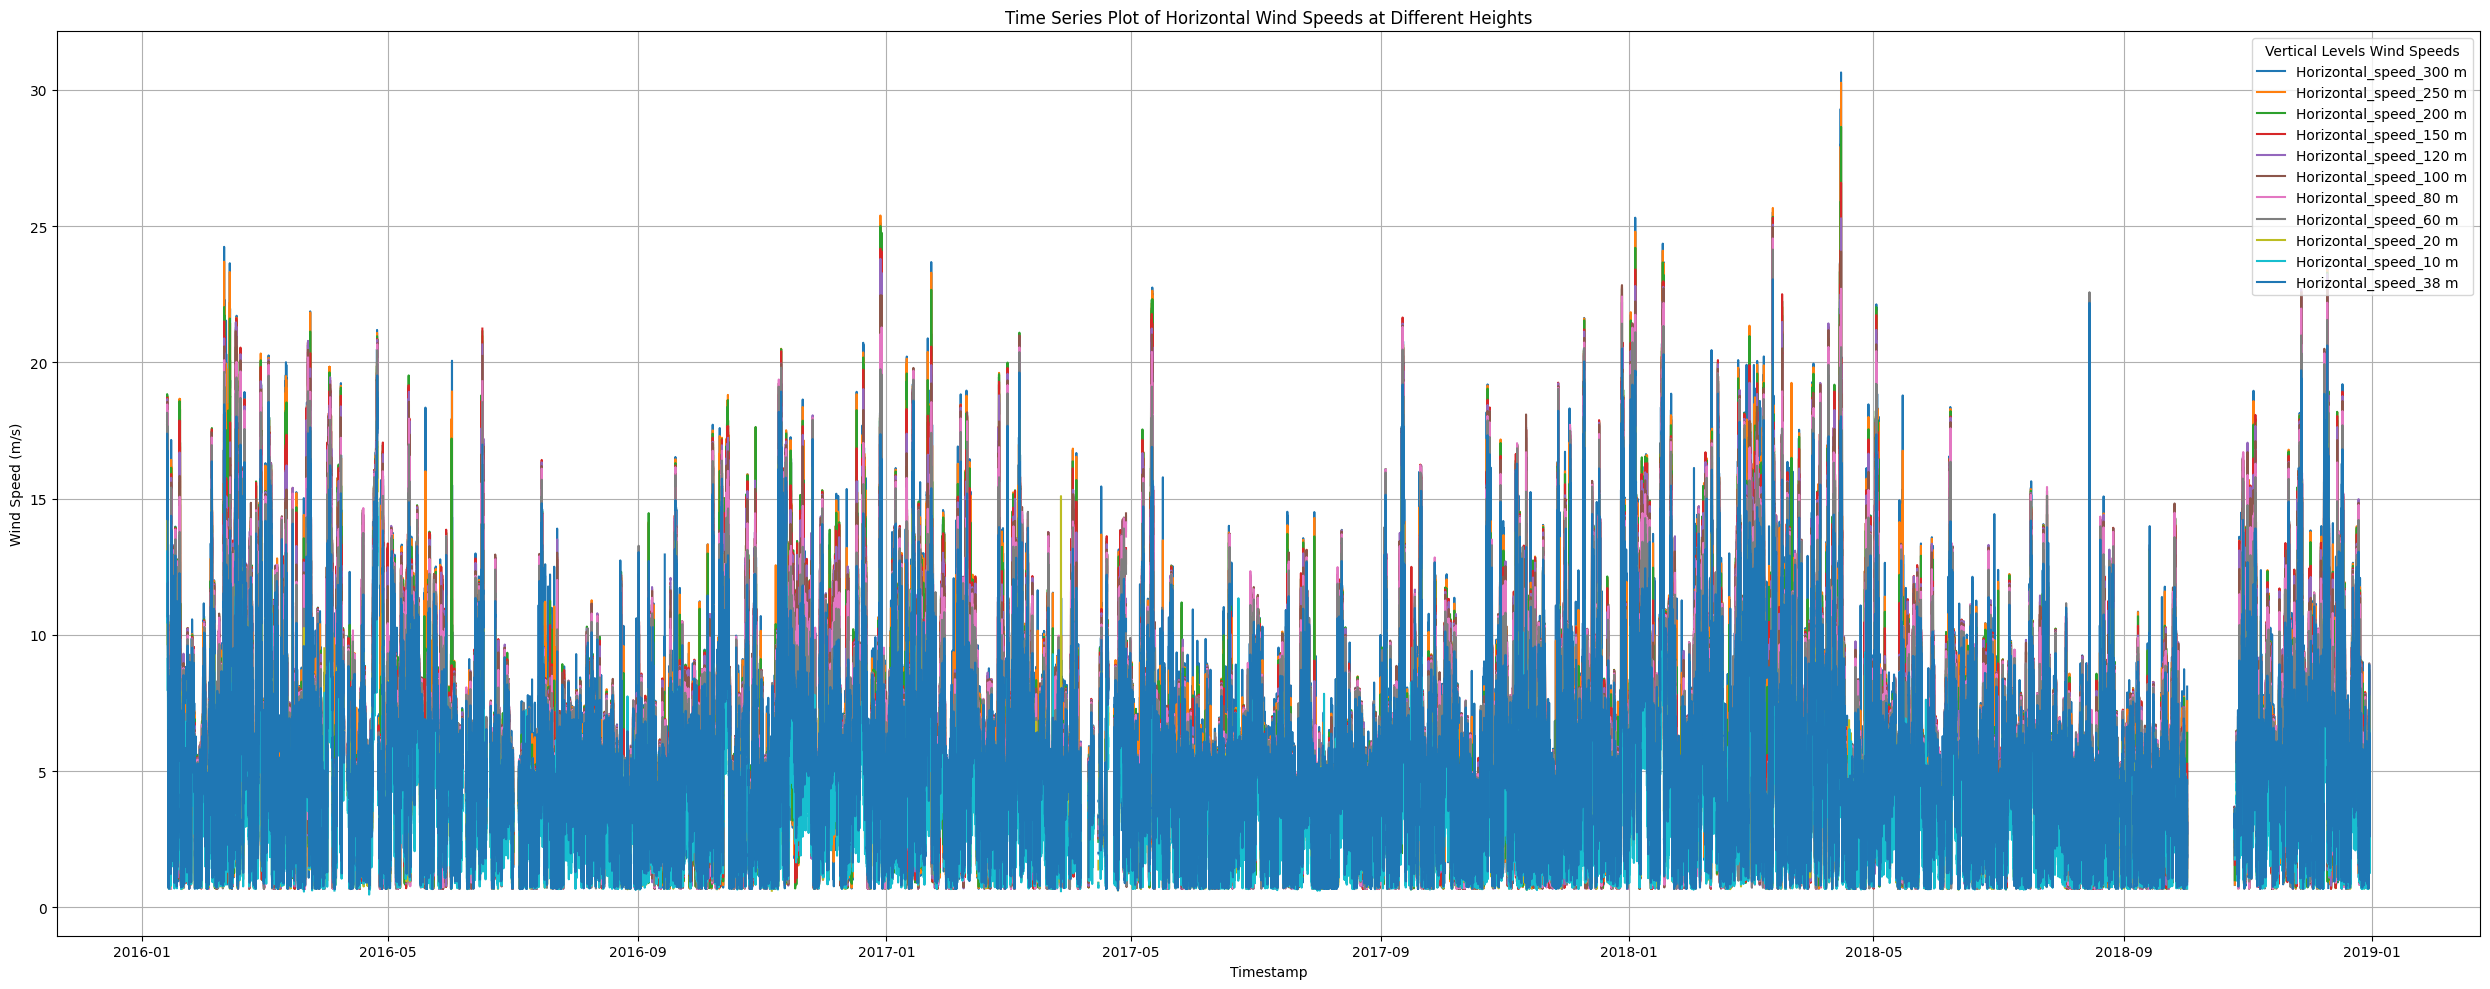

In [9]:
import matplotlib.pyplot as plt
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx')
# Define column names
# These are the ORIGINAL names from the Excel file
original_columns = [
    "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed",
    "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed",
    "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed",
    "h_10_horizontal_speed", "h_11_horizontal_speed"
]

# Define the new names after renaming
new_column_names = {
    'h_1_horizontal_speed': 'Horizontal_speed_300 m',
    'h_2_horizontal_speed': 'Horizontal_speed_250 m',
    'h_3_horizontal_speed': 'Horizontal_speed_200 m',
    'h_4_horizontal_speed': 'Horizontal_speed_150 m',
    'h_5_horizontal_speed': 'Horizontal_speed_120 m',
    'h_6_horizontal_speed': 'Horizontal_speed_100 m',
    'h_7_horizontal_speed': 'Horizontal_speed_80 m',
    'h_8_horizontal_speed': 'Horizontal_speed_60 m',
    'h_9_horizontal_speed': 'Horizontal_speed_20 m',
    'h_10_horizontal_speed': 'Horizontal_speed_10 m',
    'h_11_horizontal_speed': 'Horizontal_speed_38 m'
}

# Apply the rename operation
zephir_df.rename(columns=new_column_names, inplace=True)

# Now, create the list of columns to plot using the NEW names
columns_to_plot = list(new_column_names.values())

# Plot
plt.figure(figsize=(25, 10))

# Iterate over the NEW column names for plotting
for col in columns_to_plot:
    # Ensure the column exists in the DataFrame after renaming
    if col in zephir_df.columns:
         plt.plot(zephir_df['Timestamp'], zephir_df[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found after renaming.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Horizontal Wind Speeds at Different Heights')
plt.legend(title="Vertical Levels Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


 * Initiating NaNImputer.impute
     . Dataset dimensions:
     .. rows:         155881
     .. columns:      84
     .. mb in memory: 99.9
     .. NaN cols num: 70

   - Drop hopeless NaN cols

   - Processing whole data for imputation

   - Imputing single core 70 cols
     . Imputed (regression) - 8797     NaN in air_temperature
     . Imputed (regression) - 3        NaN in air_temperature_std
     . Imputed (regression) - 8797     NaN in air_pressure
     . Imputed (regression) - 3        NaN in air_pressure_std
     . Imputed (regression) - 8797     NaN in humidity
     . Imputed (regression) - 3        NaN in humidity_std
     . Imputed (regression) - 8832     NaN in Horizontal_speed_300 m
     . Imputed (regression) - 3        NaN in h_1_horizontal_speed_std
     . Imputed (regression) - 8797     NaN in h_1_wind_direction
     . Imputed (regression) - 3        NaN in h_1_wind_direction_std
     . Imputed (regression) - 20222    NaN in h_1_vertical_speed
     . Imputed (regressi

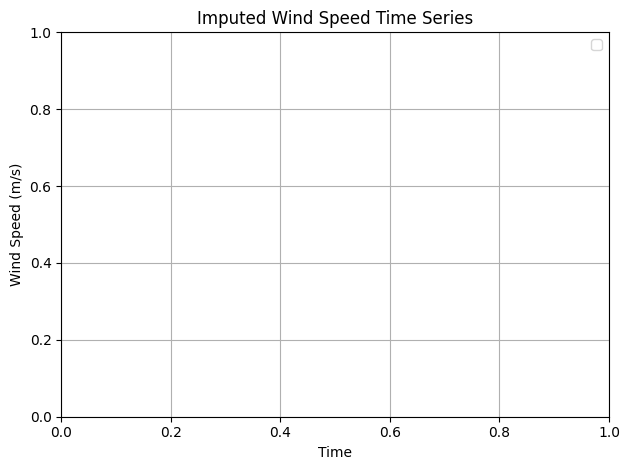

In [11]:
from verstack import NaNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Columns to impute
# cols_to_impute = ['lidar_wind_speed', 'mast_wind_speed', 'mast_wind_direction', 'T_air[C]',	'RH[%%]', 'P_air[hPa]']
cols_to_impute = ["air_temperature", "air_temperature_std", "air_pressure", "air_pressure_std",
    "humidity", "humidity_std",
    "height_1",  'Horizontal_speed_300 m', "h_1_horizontal_speed_std", "h_1_wind_direction", "h_1_wind_direction_std",
    "h_1_vertical_speed", "h_1_vertical_speed_std",
    "height_2", 'Horizontal_speed_250 m' , "h_2_horizontal_speed_std", "h_2_wind_direction", "h_2_wind_direction_std",
    "h_2_vertical_speed", "h_2_vertical_speed_std",
    "height_3", 'Horizontal_speed_200 m', "h_3_horizontal_speed_std", "h_3_wind_direction", "h_3_wind_direction_std",
    "h_3_vertical_speed", "h_3_vertical_speed_std",
    "height_4", 'Horizontal_speed_150 m', "h_4_horizontal_speed_std", "h_4_wind_direction", "h_4_wind_direction_std",
    "h_4_vertical_speed", "h_4_vertical_speed_std",
    "height_5",'Horizontal_speed_120 m', "h_5_horizontal_speed_std", "h_5_wind_direction", "h_5_wind_direction_std",
    "h_5_vertical_speed", "h_5_vertical_speed_std",
    "height_6", 'Horizontal_speed_100 m', "h_6_horizontal_speed_std", "h_6_wind_direction", "h_6_wind_direction_std",
    "h_6_vertical_speed", "h_6_vertical_speed_std",
    "height_7", 'Horizontal_speed_80 m', "h_7_horizontal_speed_std", "h_7_wind_direction", "h_7_wind_direction_std",
    "h_7_vertical_speed", "h_7_vertical_speed_std",
    "height_8",'Horizontal_speed_60 m', "h_8_horizontal_speed_std", "h_8_wind_direction", "h_8_wind_direction_std",
    "h_8_vertical_speed", "h_8_vertical_speed_std",
    "height_9", 'Horizontal_speed_20 m', "h_9_horizontal_speed_std", "h_9_wind_direction", "h_9_wind_direction_std",
    "h_9_vertical_speed", "h_9_vertical_speed_std",
    "height_10", 'Horizontal_speed_10 m', "h_10_horizontal_speed_std", "h_10_wind_direction", "h_10_wind_direction_std",
    "h_10_vertical_speed", "h_10_vertical_speed_std",
    "height_11", 'Horizontal_speed_38 m', "h_11_horizontal_speed_std", "h_11_wind_direction", "h_11_wind_direction_std",
    "h_11_vertical_speed", "h_11_vertical_speed_std",
    "Anno"]

# Impute missing values
imputer = NaNImputer(verbose=True)
# Perform imputation and assign the result back to the specific columns
imputed_data = imputer.impute(zephir_df[cols_to_impute])
zephir_df[cols_to_impute] = imputed_data[cols_to_impute] # Explicitly select and assign columns

# Check for remaining NaNs
print("Remaining NaNs after imputation:")
print(zephir_df[cols_to_impute].isna().sum())

# Ensure Timestamp is a column, not an index
# No change needed here based on the original code
if zephir_df.index.name == 'Timestamp':
    zephir_df.reset_index(inplace=False)

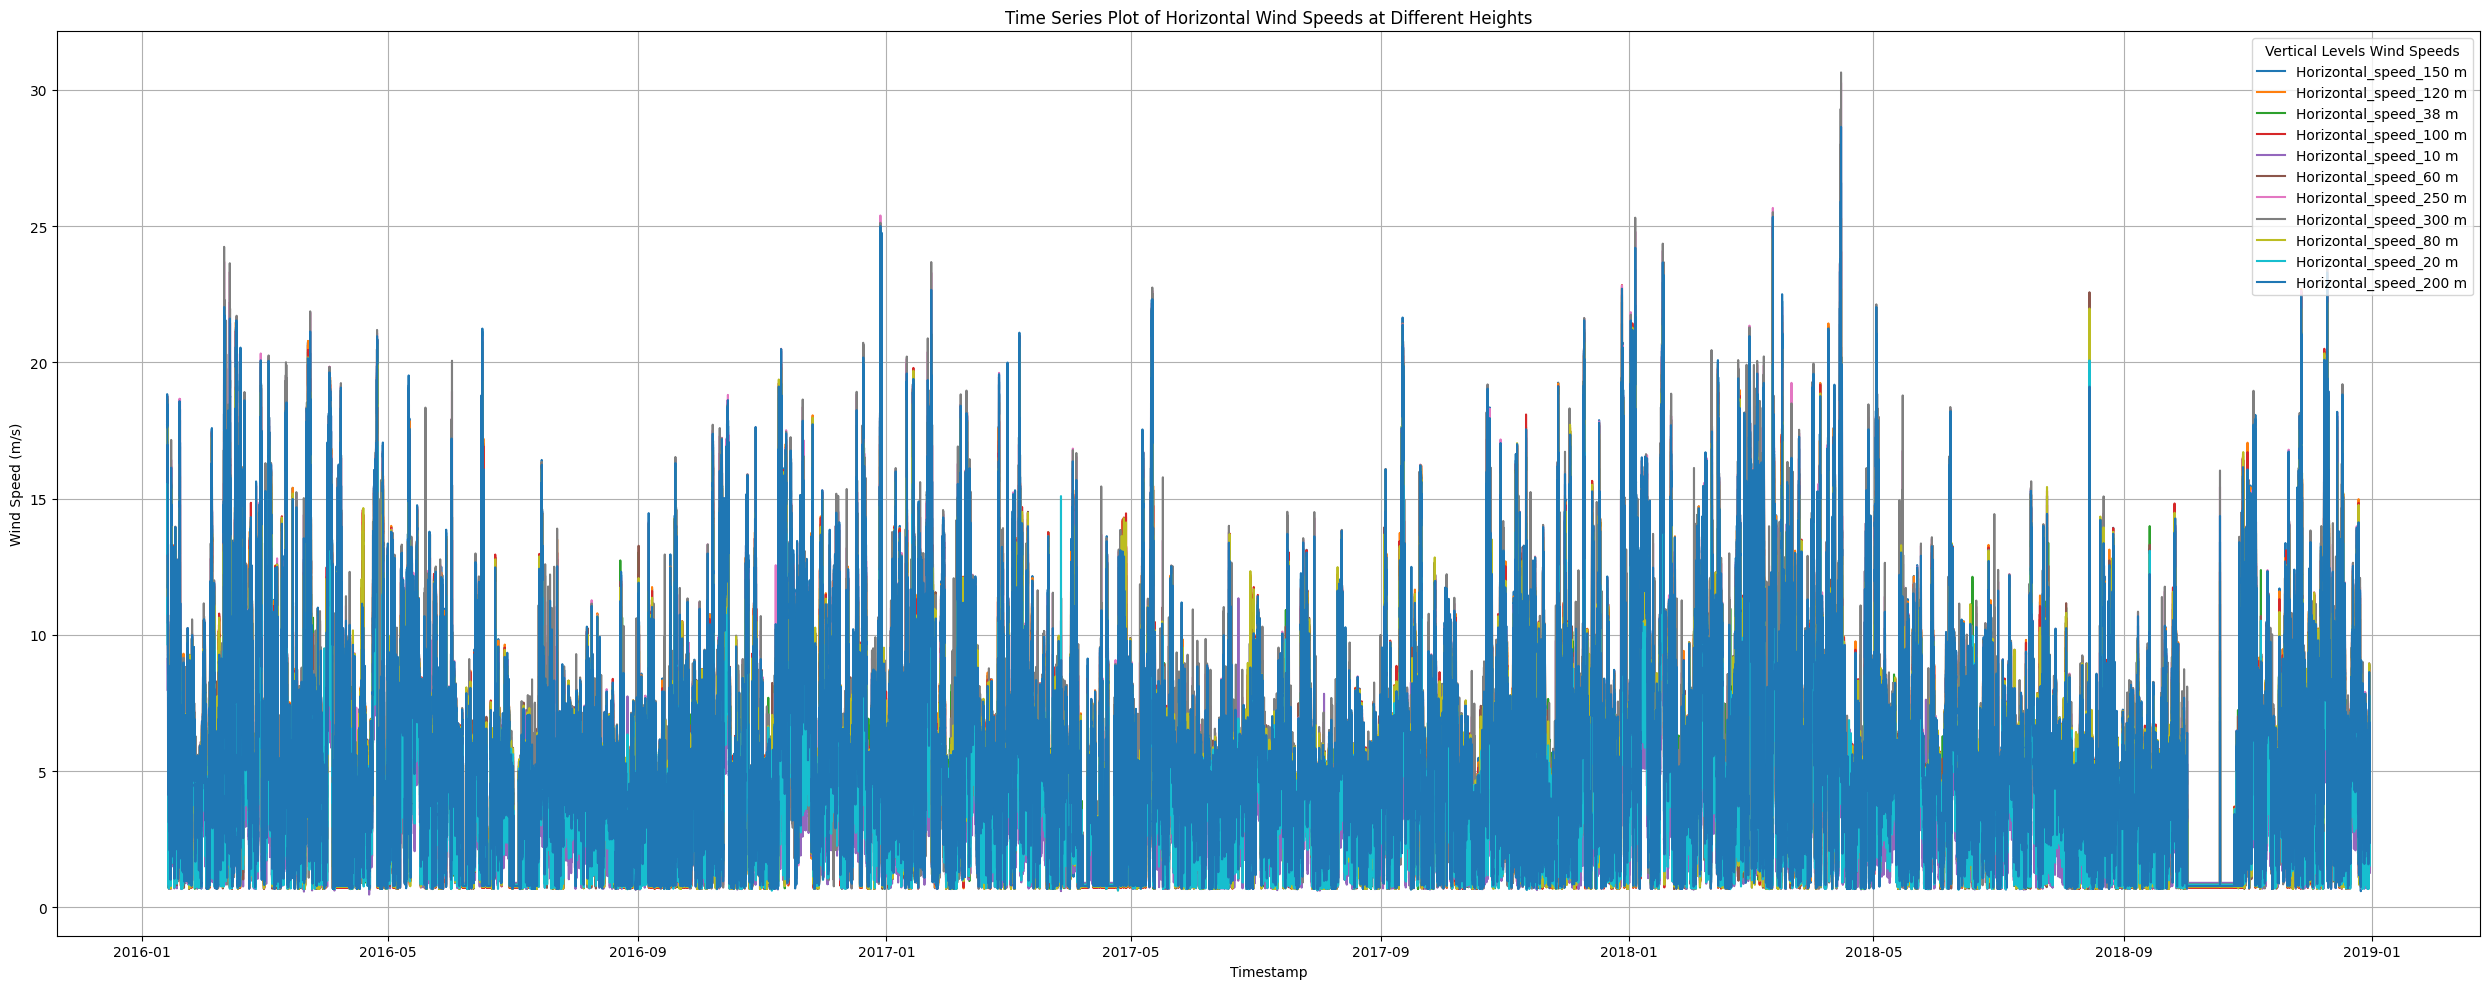

In [15]:
# Define the new names after renaming
new_column_names = {
'Horizontal_speed_300 m',
'Horizontal_speed_250 m',
'Horizontal_speed_200 m',
'Horizontal_speed_150 m',
'Horizontal_speed_120 m',
'Horizontal_speed_100 m',
'Horizontal_speed_80 m',
'Horizontal_speed_60 m',
'Horizontal_speed_20 m',
'Horizontal_speed_10 m',
'Horizontal_speed_38 m'
}


# Plot
plt.figure(figsize=(25, 10))

# Iterate over the NEW column names for plotting
for col in new_column_names:
    # Ensure the column exists in the DataFrame after renaming
    if col in zephir_df.columns:
         plt.plot(zephir_df['Timestamp'], zephir_df[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found after renaming.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Horizontal Wind Speeds at Different Heights')
plt.legend(title="Vertical Levels Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()